In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tf.__version__

'2.17.0'

In [4]:
data_test = tf.keras.utils.image_dataset_from_directory('./fruits/test', batch_size=32)

Found 130 files belonging to 3 classes.


In [5]:
data_test.class_names

['apple', 'banana', 'orange']

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory('./fruits/train', batch_size=32)

Found 460 files belonging to 3 classes.


In [7]:
data_val = tf.keras.utils.image_dataset_from_directory('./fruits/validation', batch_size=32)

Found 66 files belonging to 3 classes.


In [8]:
data_categories = data_train.class_names

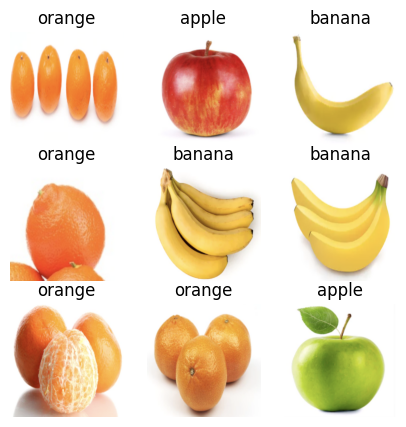

In [9]:
plt.figure(figsize=(5,5))

for image, label in data_train.take(9):
  for j in range(9):
    plt.subplot(3,3, j+1)
    plt.imshow(image[j].numpy().astype('uint8'))
    plt.title(data_categories[label[j]])
    plt.axis('off')


In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax'), # softmaxing
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model_data = model.fit(data_train, validation_data=data_val, epochs=20)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 448ms/step - accuracy: 0.3232 - loss: 24.7222 - val_accuracy: 0.5000 - val_loss: 2.0967
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.6752 - loss: 1.4448 - val_accuracy: 0.9091 - val_loss: 0.2437
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9215 - loss: 0.2045 - val_accuracy: 0.9091 - val_loss: 0.1797
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9621 - loss: 0.1417 - val_accuracy: 0.9242 - val_loss: 0.1761
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9675 - loss: 0.1160 - val_accuracy: 0.9545 - val_loss: 0.1407
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9738 - loss: 0.1067 - val_accuracy: 0.9848 - val_loss: 0.0939
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.9827 - loss: 0.0740 - val_accuracy: 0.9394 - val_loss: 0.1052
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9848 - loss: 0.0543 - val_accuracy:

Text(0.5, 1.0, 'Loss')

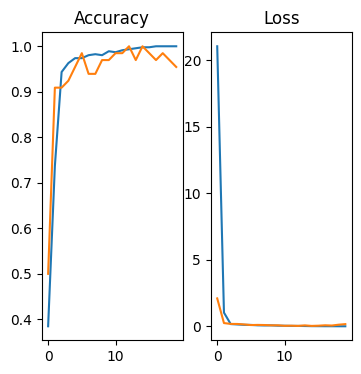

In [12]:
# model_data.history
plt.figure(figsize=(4,4))

plt.subplot(1, 2, 1)
plt.plot(range(20), model_data.history['accuracy'], label='Accuracy')
plt.plot(range(20), model_data.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), model_data.history['loss'], label='Loss')
plt.plot(range(20), model_data.history['val_loss'], label='Validation loss')
plt.title('Loss')

In [14]:
img_pic = '/orange.jpg'

image = tf.keras.utils.load_img(img_pic, target_size=(256, 256))
img_arr = tf.keras.utils.array_to_img(image)
img_data = tf.expand_dims(img_arr, 0)

predict = model.predict(img_data)

print(f"The image is a/an {data_categories[np.argmax(predict)]}, likelihood: {np.max(predict) * 100}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image is a/an orange, likelihood: 100.0
